<a href="https://colab.research.google.com/github/Kashishsingh-26/Module03_Lab01/blob/main/Mod03_Lab01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad

MODULE 3: CLASSIFICATION-1

LAB-1 : Understanding Distance metrics and Introduction to KNN

Name=Kashish Singh

SECTION - 1 : Distance metrics

In [1]:
# Importing Required Libraries
import numpy as np
import pandas as pd
import math
from scipy.spatial import distance
import matplotlib.pyplot as plt

In [2]:
# Simple 2D example
x_1 = np.array((3,4))
x_2 = np.array((9, 25))

In [3]:
# Naive approach to calculating Euclidean distance (not-vectorized)
sumv = 0
for i in range(len(x_1)):
  sumv += ((x_1[i]-x_2[i])**2)
dist = math.sqrt(sumv)
print(dist)

21.840329667841555


In [4]:
## TASK-1
## Write a vectorized version of computing Euclidean distance (using numpy) in the space given below
## (Expected number of lines ~ 1). Your answer should be stored in the variable 'euclidean_dist'
## Verify this result with what you saw above

# Write your code below and uncomment the lines below in order to run the cell.

# euclidean_dist =
# print(euclidean_dist)

Answer to Task-1

In [5]:
#@title Answer to Task-1
# Answer:
euclidean_dist = np.sqrt(np.sum((x_1-x_2)**2))
print(euclidean_dist)

21.840329667841555


In [6]:
# Libraries such as SciPy provide functions to compute different kinds of distance metrics between points
euclidean_dist = distance.euclidean(x_1, x_2)
print(euclidean_dist)

21.840329667841555


In [7]:
# 3-D Visualization
plotx = np.linspace(-20,20,60)
meshx, meshy = np.meshgrid(plotx,plotx)

In [8]:
tempeuclid = np.sqrt((meshx**2 + meshy**2))

In [9]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(z=tempeuclid, x=plotx, y=plotx)])
fig.update_layout(title='Euclidean Distance from origin', autosize=False,
                  width=1000, height=1000,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

Manhattan Distance



In [10]:
# Libraries such as SciPy provide functions to compute different kinds of distance metrics between points
# x_1 = np.array((3, 4))
# x_2 = np.array((9, 25))
manhattan_dist = distance.cityblock(x_1, x_2)
print(manhattan_dist)

27


In [11]:
## TASK-2
## Write a vectorized version of computing Manhattan distance (using numpy) in the space given below
## (Expected number of lines ~ 1). Your answer should be stored in the variable 'manhattan_dist'
## Verify your result with the output of the scipy function in the previous cell.

# Write your code below and uncomment the lines below in order to run the cell.

# manhattan_dist =
# print(manhattan_dist)

In [ ]:
#@title Answer to Task-2
# Answer:
manhattan_dist = np.sum(np.abs((x_1 - x_2)))
print(manhattan_dist)

In [12]:
# 3-D visualization
plotx = np.linspace(-20,20,60)
meshx, meshy = np.meshgrid(plotx,plotx)

In [13]:
tempmanhattan = np.abs(meshx) + np.abs(meshy)

In [14]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(z=tempmanhattan, x=plotx, y=plotx)])
fig.update_layout(title='Manhattan Distance from origin', autosize=False,
                  width=1000, height=1000,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

Minkowski Distance

In [15]:
# x_1 = np.array((3, 4))
# x_2 = np.array((9, 25))
minkowski_distance = distance.minkowski(x_1, x_2, p=3)
print("Minkowski distance when p=3 is ",minkowski_distance)

Minkowski distance when p=3 is  21.162012189486813


In [16]:
# You can verify that this distance is the same as Manhattan dist when p=1,
# and Euclidean dist when p=2

minkowski_dist_p1 = distance.minkowski(x_1,x_2,p=1)
print("Minkowski distance when p=1 is ",minkowski_dist_p1)
minkowski_dist_p2 = distance.minkowski(x_1,x_2,p=2)
print("Minkowski distance when p=2 is ",minkowski_dist_p2)

Minkowski distance when p=1 is  27.0
Minkowski distance when p=2 is  21.840329667841555


Hamming Distance

In [17]:
str_1 = 'euclidean'
str_2 = 'manhattan'
hamming_dist = distance.hamming(list(str_1), list(str_2)) * len(str_1)
print(hamming_dist)

# Note that the answer will be 7, as except for the last two letters ('a' and 'n'), all
# the other corresponding letters in the two strings are different.

7.0


Cosine Similarity

In [18]:
from numpy.linalg import norm

# x_1 = np.array((3, 4))
# x_2 = np.array((9, 25))

cosine_similarity = 1 - distance.cosine(x_1,x_2)
print(cosine_similarity)

cosine_similarity = np.dot(x_1, x_2)/(norm(x_1)*norm(x_2))
print(cosine_similarity)

0.9559416104586265
0.9559416104586265


Chebyshev Distance

In [19]:
# x_1 = np.array((3, 4))
# x_2 = np.array((9, 25))

chebyshev_distance = distance.chebyshev(x_1,x_2)
print(chebyshev_distance)

21


Jaccard Distance

In [20]:
## In the context of binary vectors, let's say:
## a = no. of indices where vector1[i] == 1 == vector2[i]
## b = no. of indices where vector1[i] == 0 and vector2[i] == 1
## c = no. of indices where vector1[i] == 1 and vector2[i] == 0
## d = no. of indices where vector1[i] == 0 == vector2[i]
## Jaccard-distance = 1 - [a/(a+b+c)]

print(distance.jaccard([1, 0, 0], [0, 1, 0]))
print(distance.jaccard([1, 0, 0], [1, 1, 0]))
print(distance.jaccard([1, 0, 0], [1, 1, 1]))

1.0
0.5
0.6666666666666666


In [21]:
def jaccard_similarity(a, b):
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

list1 = ['dog', 'cat', 'rat']
list2 = ['dog', 'cat', 'mouse', 'rabbit']
# The intersection is ['dog', 'cat']
# union is ['dog', 'cat', 'rat', 'mouse, 'rabbit']
words1 = set(list1)
words2 = set(list2)
print("Jaccard similarity is :",jaccard_similarity(words1, words2))
print("Jaccard distance is :", 1-jaccard_similarity(words1, words2))

Jaccard similarity is : 0.4
Jaccard distance is : 0.6


SECTION - 2 : KNN

SECTION - 2.1: KNN on a Synthetic Dataset

In [28]:
import random
import scipy.stats as ss
from sklearn.neighbors import KNeighborsClassifier

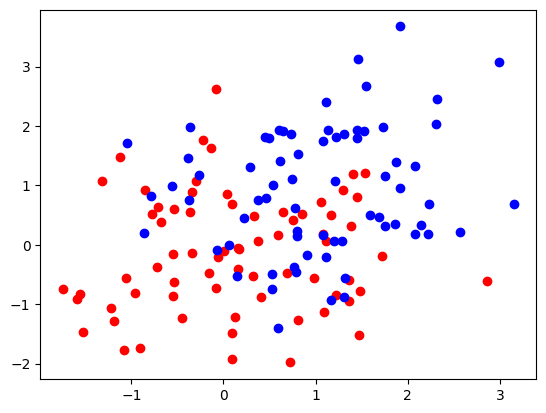

In [29]:
def generate_synth_data(n = 70):
    points = np.concatenate((ss.norm(0, 1).rvs((n, 2)), ss.norm(1, 1).rvs((n, 2))), axis = 0)
    outcomes = np.concatenate((np.repeat(0, n), np.repeat(1, n)))
    return (points, outcomes)

n = 70
pts,tgts = generate_synth_data(n) #generates 100 points
# print(tgts)
plt.figure()
plt.plot(pts[:n, 0], pts[:n, 1], "ro")
plt.plot(pts[n:, 0], pts[n:, 1], "bo")
plt.show()

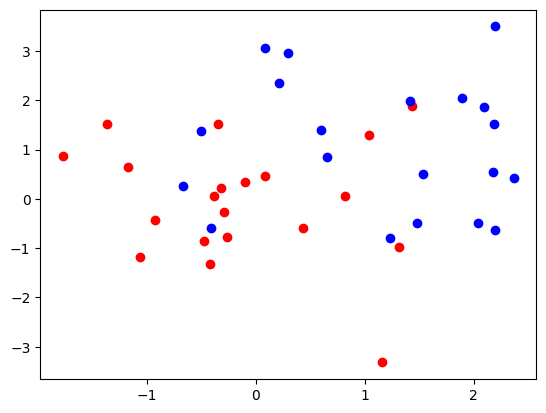

In [30]:
n = 20
test_pts,test_tgts = generate_synth_data(n)
# print(test_tgts)
plt.figure()
plt.plot(test_pts[:n, 0], test_pts[:n, 1], "ro")
plt.plot(test_pts[n:, 0], test_pts[n:, 1], "bo")
plt.show()

In [31]:
## TASK - 3
## The code given below is that of a KNN classifier, provided by Scikit-learn.
## The parameter 'metric' includes various distance metric options, including those
## we learnt above- manhattan, euclidean, minkowski,chebyshev, hamming, etc.

## Try out different metrics and observe changes in the accuracy, if any. Don't change value of 'k'
## Also, experiment with different metrics and observe if they are applicable for this kind of data.
## If there are any additional parameters needed, for instance, 'p' in case of Minkowski distance, include them.

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(pts, tgts)
our_predictions = knn.predict(test_pts)
print("Prediction Accuracy: ")
print(100 * np.mean(our_predictions == test_tgts))

Prediction Accuracy: 
72.5


SECTION - 2.2: KNN on a Real World dataset



In [32]:
from sklearn.datasets import load_iris
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
# data['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
data['target'] = pd.Series(iris.target)
data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [33]:
np.random.seed(123)
indices = np.random.permutation(data.shape[0])
div = int(0.65 * len(indices))
train_idx, test_idx = indices[:div], indices[div:]

train_set, test_set = data.loc[train_idx,:], data.loc[test_idx,:]
test_class = list(test_set.iloc[:,-1])
train_class = list(train_set.iloc[:,-1])

In [34]:
def dist_euclidean(X1,X2):
    return distance.euclidean(X1,X2)

In [35]:
def dist_cosine(X1,X2):
    return distance.cosine(X1,X2)

In [36]:
def dist_manhattan(X1,X2):
    return distance.cityblock(X1,X2)

In [37]:
def dist_chebyshev(X1,X2):
    return distance.chebyshev(X1,X2)

In [38]:
metrics_list = [dist_euclidean,dist_cosine, dist_manhattan, dist_chebyshev]
for dist_metric in metrics_list:
  knn = KNeighborsClassifier(n_neighbors = 3, metric=dist_metric)
  knn.fit(train_set, train_class)
  our_predictions = knn.predict(test_set)
  print(dist_metric.__name__)
  print("Prediction Accuracy: ")
  print(100 * np.mean(our_predictions == test_class))
  print()

dist_euclidean
Prediction Accuracy: 
100.0

dist_cosine
Prediction Accuracy: 
100.0

dist_manhattan
Prediction Accuracy: 
100.0

dist_chebyshev
Prediction Accuracy: 
100.0



Questions to Think About and Answer:

Q 1)How are similarity and distance different from each other?

Q 2)Are there any conditions for a particular distance to be considered a "distance metric"?

Answer 1 :

Similarity and distance are two related concepts used in various fields, such as mathematics, statistics, data analysis, and machine learning, to measure the relationship or dissimilarity between objects or data points. They are essentially opposite in their interpretation, and their usage depends on the context. Here's how they differ:

Similarity:

Similarity measures quantify how much two objects or data points resemble each other or have something in common. High similarity implies that the objects are more alike, while low similarity suggests they are less alike. Similarity measures produce values that are higher when the objects are more similar and lower when they are less similar. These values often range from 0 (no similarity) to 1 (perfect similarity) or some other scale depending on the specific measure. Common similarity measures include cosine similarity, Jaccard similarity, and correlation coefficient, among others.

Distance:

Distance measures, on the other hand, quantify the dissimilarity or separation between two objects or data points. High distance implies that the objects are more dissimilar or far apart, while low distance suggests they are closer or more similar. Distance measures produce values that are higher when the objects are more dissimilar and lower when they are closer or more similar. These values often range from 0 (no distance) to positive values, with larger values indicating greater dissimilarity. Common distance measures include Euclidean distance, Manhattan distance, and Hamming distance, among others.

Answer 2 :

Yes, for a function to be considered a "distance metric" or a "metric," it must satisfy a set of specific conditions known as the metric axioms. These axioms ensure that the function measures the distance between points in a consistent and meaningful way. There are four primary axioms that a distance function must meet to be considered a metric:

Non-negativity:

The distance between any two points must always be a non-negative real number or zero. Mathematically, for any two points x and y:

d(x, y) ≥ 0

d(x, y) = 0 if and only if x = y.

Identity of Indiscernibles:

The distance between two distinct points should be zero only when those points are identical. In other words, if the distance between two points is zero, then the points themselves must be the same. Mathematically:

d(x, y) = 0 if and only if x = y.

Symmetry:

The distance from point x to point y should be the same as the distance from point y to point x. Mathematically:

d(x, y) = d(y, x) for all x and y.

Triangle Inequality:

The distance between two points, via a third point, should be equal to or shorter than the direct distance between those two points. Mathematically, for all x, y, and z:

d(x, y) + d(y, z) ≥ d(x, z)

If a function satisfies all of these conditions, it is considered a metric, and it can be used to define a meaningful distance between points. Metrics are commonly used in various fields, including mathematics, computer science, and data analysis, to measure the distance or dissimilarity between data points in a consistent and mathematically sound manner. Many well-known distance measures, such as the Euclidean distance, Manhattan distance, and Hamming distance, are metrics because they satisfy these axioms.